## Step 1: 
Read in Titanic.csv and observe a few samples, some features are categorical, and others are numerical. If some features are missing, fill them in using the average of the same feature of other samples. Take a random 80% samples for training and the rest 20% for test. 

In [1]:
# import matplotlib.pyplot as plt
# import numpy as np
import pandas as pd

# import data/Read in Titanic.csv
data = pd.read_csv("Titanic.csv")

# observe few samples
data


,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1st,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.337494,B5,Southampton,2,NaN,"St Louis, MO"
1,2,1st,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.550003,C22 C26,Southampton,11,NaN,"Montreal, PQ / Chesterville, ON"
2,3,1st,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,4,1st,0,"Allison, Mr. Hudson Joshua Crei",male,30.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,5,1st,0,"Allison, Mrs. Hudson J C (Bessi",female,25.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3rd,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.454200,NaN,Cherbourg,NaN,328.0,NaN
1305,1306,3rd,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.454200,NaN,Cherbourg,NaN,NaN,NaN
1306,1307,3rd,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.225000,NaN,Cherbourg,NaN,304.0,NaN
1307,1308,3rd,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.225000,NaN,Cherbourg,NaN,NaN,NaN


In [2]:
data.info() # further analysis for data cleaning purposes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1309 non-null   int64  
 1   pclass      1309 non-null   object 
 2   survived    1309 non-null   int64  
 3   name        1309 non-null   object 
 4   sex         1309 non-null   object 
 5   age         1046 non-null   float64
 6   sibsp       1309 non-null   int64  
 7   parch       1309 non-null   int64  
 8   ticket      1309 non-null   object 
 9   fare        1308 non-null   float64
 10  cabin       295 non-null    object 
 11  embarked    1307 non-null   object 
 12  boat        486 non-null    object 
 13  body        121 non-null    float64
 14  home.dest   745 non-null    object 
dtypes: float64(3), int64(4), object(8)
memory usage: 153.5+ KB


There are 1309 entries and some columns have rows that are missing values. The fare columns is missing one, embarked is missing 2, boat, age, body, home dest, and cabin are missing multiple features. Some features have numerical values while others are text. Some features are discrete values like 1st class vs 2nd class, or some are continuous values like fare or age.

In [3]:
# fill out missing features that have type of numerical values with the mean

ageMean = data["age"].mean()
data["age"].fillna(ageMean, inplace=True)
print("age average: ", ageMean)

fareMean = data["fare"].mean()
data["fare"].fillna(fareMean, inplace=True)
print("fare average: ", fareMean)

bodyMean = data["body"].mean()
data["body"].fillna(bodyMean, inplace=True)
print("body average: ", bodyMean)


age average:  29.881134512434034
fare average:  33.29547938641438
body average:  160.8099173553719


Take a random 80% samples for training and the rest 20% for test. 

In [4]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

## Step 2: 
Fit a decision tree model using independent variables ‘pclass + sex + age + sibsp’ and 
dependent variable ‘survived’. Plot the full tree. Make sure ‘survived’ is a qualitative variable taking 1 (yes) or 0 (no) in your code. 

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(["1st", "2nd", "3rd"])
transformedPclass = le.transform(train_set.pclass[:].values)

train_set['pclass'] = transformedPclass


le.fit(["female", "male"])
transformedSex = le.transform(train_set.sex[:].values)
# list(le.inverse_transform(test))
train_set['sex'] = transformedSex


features = ["pclass", "sex", "age", "sibsp"]
X = pd.get_dummies(train_set[features])
y = train_set["survived"]

print("---------------FEATURES---------------------")
print(X)

print("---------------TARGET---------------------")
print(y)
tree_clf = DecisionTreeClassifier().fit(X.values, y)

import os

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id)

from sklearn import tree
from sklearn.tree import export_graphviz
tree.export_graphviz(
            tree_clf,
            out_file=image_path("tree.dot"),
            feature_names=features,
            class_names="survived",
            rounded=True,
            filled=True
        )

---------------FEATURES---------------------
      pclass  sex        age  sibsp
772        2    1  17.000000      0
543        1    1  36.000000      0
289        0    0  18.000000      0
10         0    1  47.000000      1
147        0    1  29.881135      0
...      ...  ...        ...    ...
1095       2    0  29.881135      0
1130       2    0  18.000000      0
1294       2    1  28.500000      0
860        2    0  26.000000      0
1126       2    0  28.000000      0

[1047 rows x 4 columns]
---------------TARGET---------------------
772     0
543     0
289     1
10      0
147     0
       ..
1095    0
1130    0
1294    0
860     1
1126    0
Name: survived, Length: 1047, dtype: int64


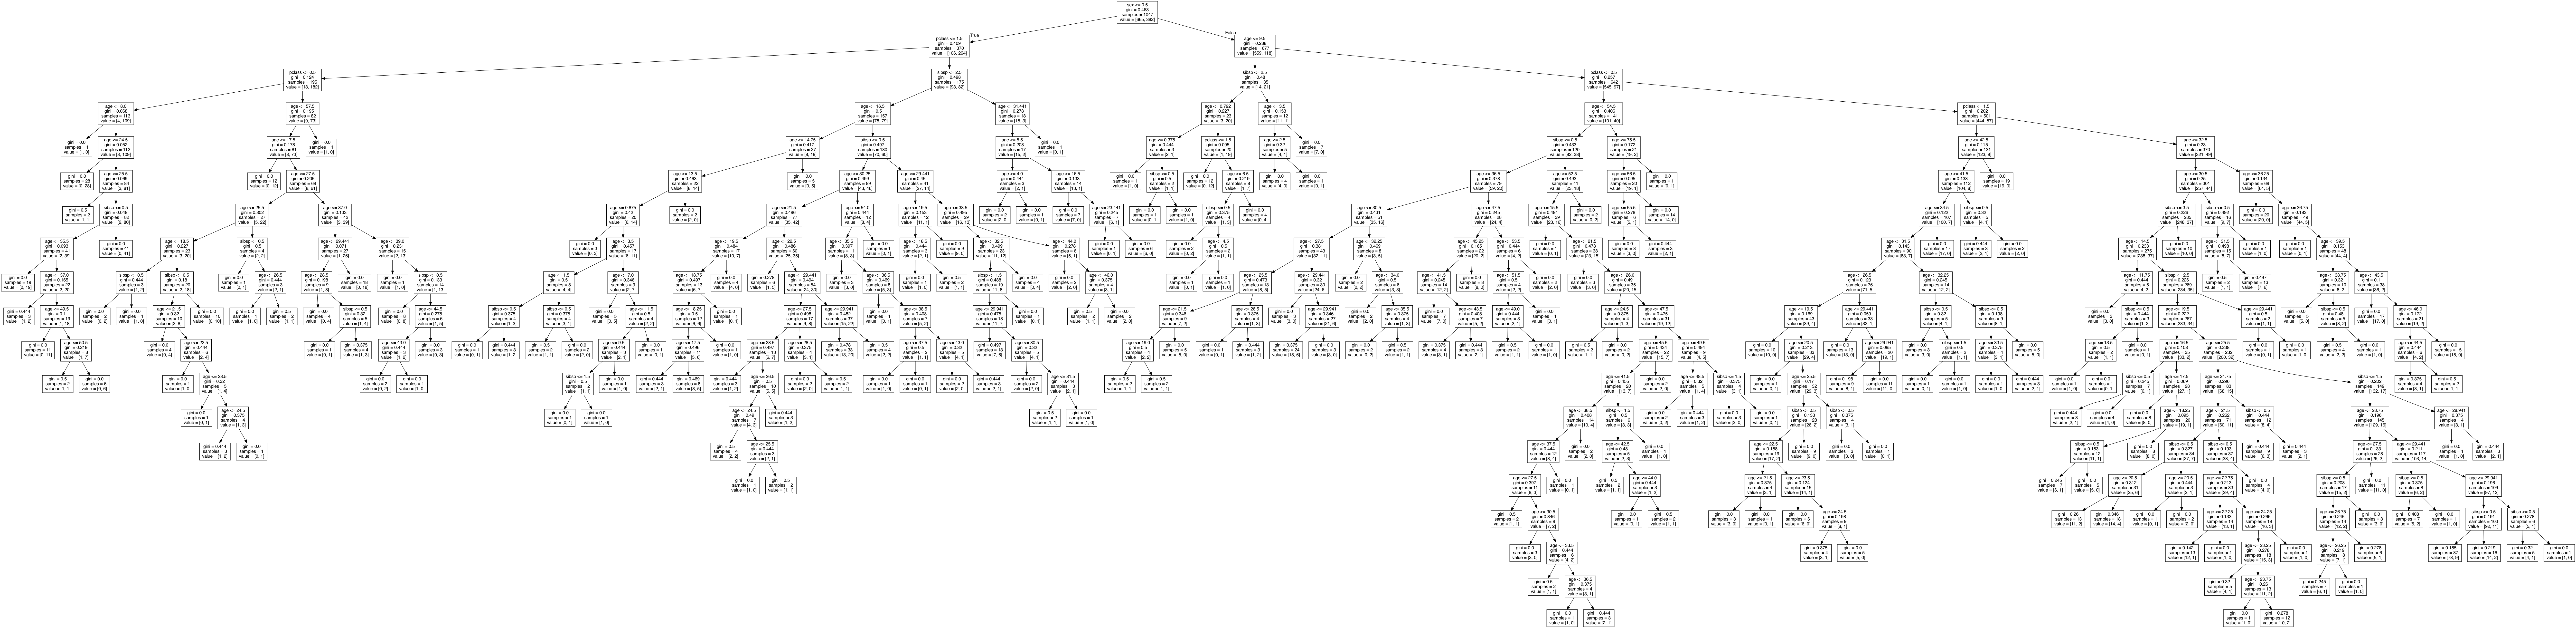

In [6]:
from graphviz import Source

graph = Source( tree.export_graphviz(tree_clf, out_file=None, feature_names=features))
png_bytes = graph.pipe(format='png')
with open('tree.png','wb') as f:
    f.write(png_bytes)

from IPython.display import Image
Image(png_bytes)

## Step 3: 
Use the GridSearchCV() function to find the best parameter max_leaf_nodes to prune the 
tree. Plot the pruned tree which shall be smaller than the tree you obtained in Step 2. 

In [7]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                  'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                 'random_state':[0, 1, 2, 3, 4, 5, 10],
                 'criterion':['gini','entropy'],
                 }
    
grid_search = GridSearchCV(tree_clf, param_grid, cv=10,
                               scoring='neg_mean_squared_error',
                               return_train_score=True)

In [8]:
# grid_search
grid_search.fit(X, y)
print("params: ",grid_search.best_params_)

tree_clf = DecisionTreeClassifier(max_depth=4).fit(X.values, y) # train model using training data

export_graphviz(
            tree_clf,
            out_file=image_path("pruned.dot"),
            feature_names=features,
            class_names="survived",
            rounded=True,
            filled=True
        )

params:  {'criterion': 'gini', 'max_depth': 4, 'max_features': 3, 'random_state': 3}


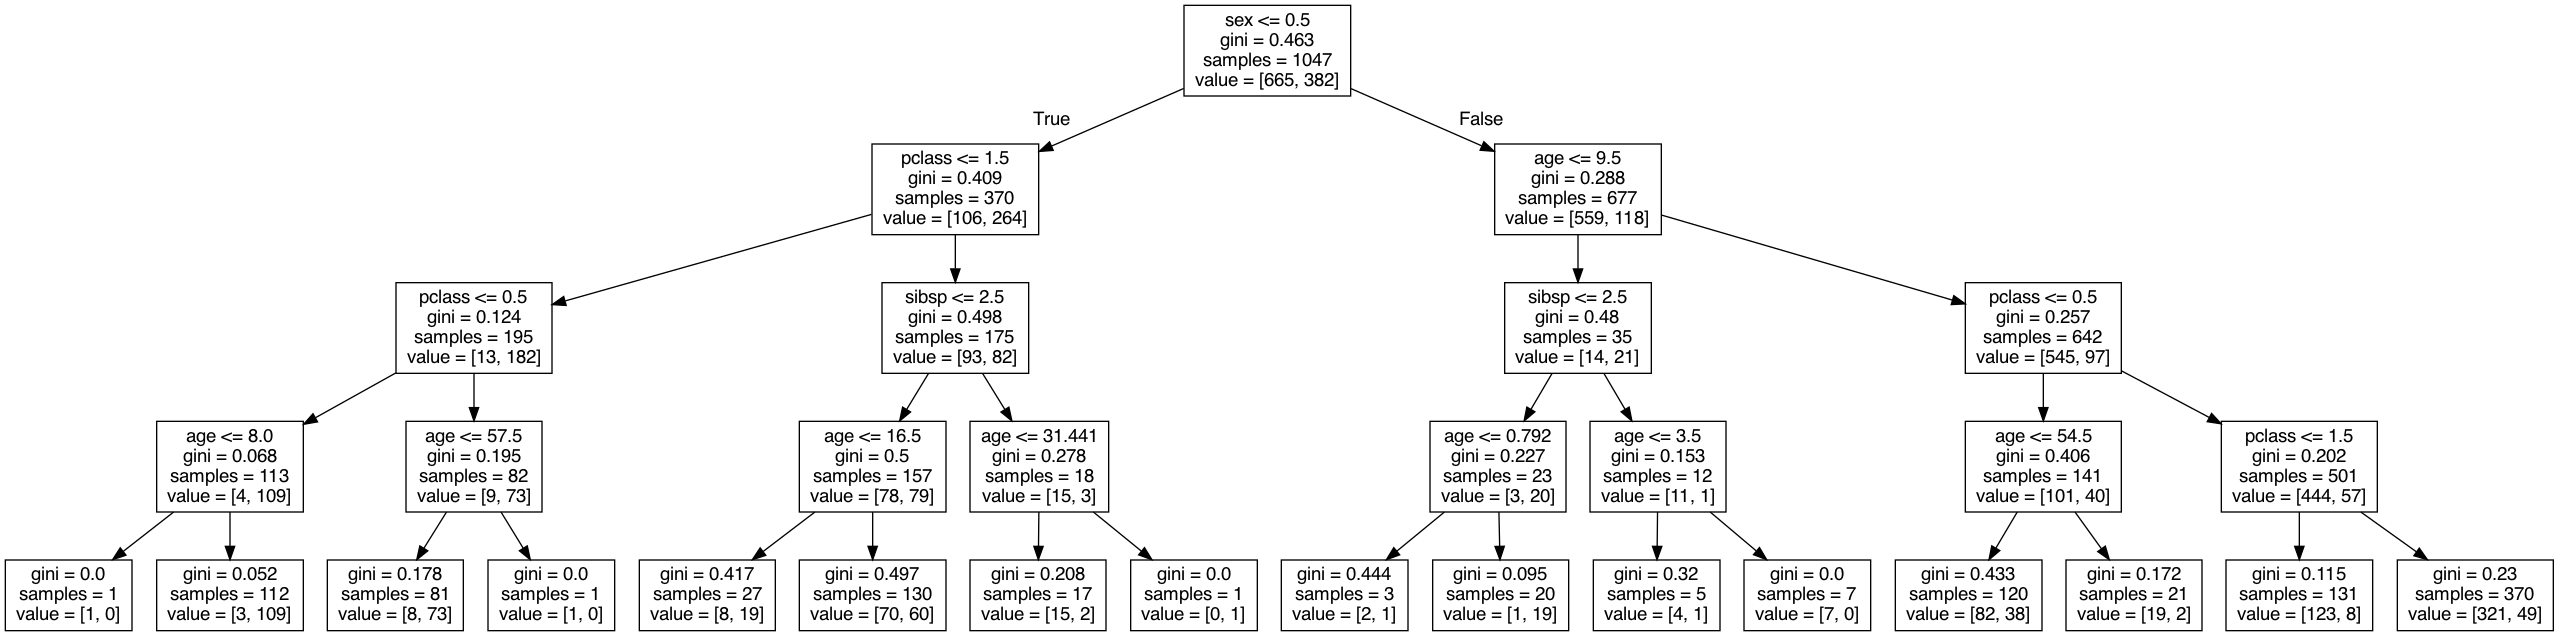

In [9]:
graph_pruned = Source( tree.export_graphviz(tree_clf, out_file=None, feature_names=features))
png_bytes_pruned = graph_pruned.pipe(format='png')
with open('pruned.png','wb') as f_pruned:
    f_pruned.write(png_bytes_pruned)

Image(png_bytes_pruned)

## Step 4: 
For the pruned tree, report its accuracy on the test set for the following: 
 
percent survivors correctly predicted (on test set) 

percent fatalities correctly predicted (on test set) 

In [10]:
# encode test data
le.fit(["1st", "2nd", "3rd"])
transformedPclass = le.transform(test_set.pclass[:].values)
test_set['pclass'] = transformedPclass

le.fit(["female", "male"])
transformedSex = le.transform(test_set.sex[:].values)
test_set['sex'] = transformedSex

# assign features and classes from test data
X_test = pd.get_dummies(test_set[features])
y_test = test_set["survived"]

In [11]:
from sklearn.model_selection import cross_val_predict
# y_test_pred = cross_val_predict(tree_clf, X_test.values, y_test, cv=10) # get predicted values with test data
y_test_pred = tree_clf.predict(X_test.values)

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_test_pred) # build confusion matrix

print("------------confusion matrix-------------")
print(conf_matrix)
print("-----------------------------------------")

TN = conf_matrix[0][0]
FP = conf_matrix[0][1]
FN = conf_matrix[1][0]
TP = conf_matrix[1][1]


survivorsPredictAccuracy = TP/(TP + FN)
fatalityPredictAccuracy = TN/(FP + TN) 

print("--------------------Accuracy Results (Test Data)--------------------")
print("percent of fatalities correctly predicted: {0:.2f}%".format(fatalityPredictAccuracy * 100))
print("percent of survivors correctly predicted: {0:.2f}%".format(survivorsPredictAccuracy * 100))
print("--------------------------------------------------------")

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy of DT classifier on test set: {:.2f}'
     .format(tree_clf.score(X_test.values, y_test)))
print('F1: {:.2f}'.format(f1_score(y_test, y_test_pred)))

------------confusion matrix-------------
[[138   6]
 [ 61  57]]
-----------------------------------------
--------------------Accuracy Results (Test Data)--------------------
percent of fatalities correctly predicted: 95.83%
percent of survivors correctly predicted: 48.31%
--------------------------------------------------------
Accuracy of DT classifier on test set: 0.74
F1: 0.63


## Step 5: 
Use the RandomForestClassifier() function to train a random forest using the value of max_leaf_nodes you found in Step 3. You can set n_estimators as 50.  Report the accuracy of random forest on the test set for the following:  
 
percent survivors correctly predicted (on test set) 

percent fatalities correctly predicted (on test set) 
 
Check whether there is improvement as compared to a single tree obtained in Step 4. 


In [12]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators = 50,
                            random_state=42).fit(X.values, y)

# y_probas_forest = cross_val_predict(forest_clf, X_test.values, y_test, cv=10)
y_test_pred = forest_clf.predict(X_test.values)

conf_matrix = confusion_matrix(y_test, y_test_pred) # build confusion matrix

print("------------confusion matrix-------------")
print(conf_matrix)
print("-----------------------------------------")

TN = conf_matrix[0][0]
FP = conf_matrix[0][1]
FN = conf_matrix[1][0]
TP = conf_matrix[1][1]


survivorsPredictAccuracy = TP/( TP + FN)
fatalityPredictAccuracy = TN/(FP + TN) 

print("--------------------Accuracy Results (Test Data)--------------------")
print("percent of fatalities correctly predicted: {0:.2f}%".format(fatalityPredictAccuracy * 100))
print("percent of survivors correctly predicted: {0:.2f}%".format(survivorsPredictAccuracy * 100))
print("--------------------------------------------------------")

print('Accuracy of RF classifier on test set: {:.2f}'
     .format(forest_clf.score(X_test.values, y_test)))
print('F1: {:.2f}'.format(f1_score(y_test, y_test_pred)))


------------confusion matrix-------------
[[127  17]
 [ 48  70]]
-----------------------------------------
--------------------Accuracy Results (Test Data)--------------------
percent of fatalities correctly predicted: 88.19%
percent of survivors correctly predicted: 59.32%
--------------------------------------------------------
Accuracy of RF classifier on test set: 0.75
F1: 0.68


There is a slight improvement using random forest classifier vs a single decision tree in step 4. However, there are more false positives with the random forest classifier, therefore, its percent of fatalities correctly predicted is less than it is with a single decision tree. On the other hand, the percentage of survivors correctly predicted increased with the RF model more than the percentage of fatilities decreased, so overall, there is a net improvement. This is also supported by the F1 and tree scores being better for RF than one single DT. 